In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from fcmeans import FCM

In [ ]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [ ]:
df= pd.read_csv(location+'bank-additional-full.csv', sep=",")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [ ]:
# Null value estimation
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
# drop the higly correltaed column
df = df.drop(["emp.var.rate","nr.employed"],axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [ ]:
#label encoding for categorical datas

#separate the distinct variables out into booleans(0,1)
jobDummies = pd.get_dummies(df['job'], prefix = 'job')
maritalDummies = pd.get_dummies(df['marital'], prefix = 'marital')
educationDummies = pd.get_dummies(df['education'], prefix = 'education')
defaultDummies = pd.get_dummies(df['default'], prefix = 'default')
housingDummies = pd.get_dummies(df['housing'], prefix = 'housing')
loanDummies = pd.get_dummies(df['loan'], prefix = 'loan')
contactDummies = pd.get_dummies(df['contact'], prefix = 'contact')
poutcomeDummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')

# Assigning numerical values and storing in another column
df['month']=df['month'].astype('category')
print("before: ", df['month'].dtype)
df['day_of_week']=df['day_of_week'].astype('category')
df['y']=df['y'].astype('category')

df['month'] = df['month'].cat.codes
print("after: ", df['month'].dtype)
df['day_of_week'] = df['day_of_week'].cat.codes
df['y'] = df['y'].cat.codes

df["age"]=df["age"].astype("int")
df["duration"]=df["duration"].astype("int")
df["pdays"]=df["pdays"].astype("int")
df["previous"]=df["previous"].astype("int")
df["campaign"]=df["campaign"].astype("int")
data_int=df.select_dtypes(include=['int','float64','bool'])
new_df=pd.concat([data_int,jobDummies,maritalDummies,educationDummies,defaultDummies,housingDummies,loanDummies
                  ,contactDummies,poutcomeDummies,df['month'],df['day_of_week'],df['y']],axis=1)
new_df.head()

before:  category
after:  int8


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month,day_of_week,y
0,56,261,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
1,57,149,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
2,37,226,1,999,0,93.994,-36.4,4.857,0,0,...,0,0,0,1,0,1,0,6,1,0
3,40,151,1,999,0,93.994,-36.4,4.857,1,0,...,0,0,0,1,0,1,0,6,1,0
4,56,307,1,999,0,93.994,-36.4,4.857,0,0,...,0,1,0,1,0,1,0,6,1,0


In [ ]:
#Variables and Output
X=new_df.iloc[:, 0:48]
y=new_df.iloc[:,[48]]

K Means clustering - Fold wise Resutls


 *******K means fold:  1 **********
Accuracy score:  0.868657441126487


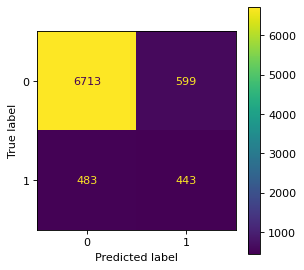

Specificity:  0.9180798687089715
Sensitivity 0.47840172786177104
Precision 0.42514395393474086
F1_score 0.4502032520325203


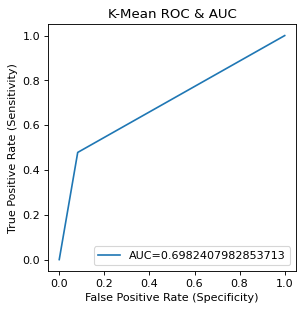


 *******K means fold:  2 **********
Accuracy score:  0.8652585579024035


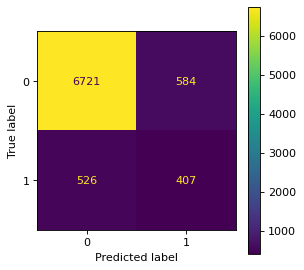

Specificity:  0.9200547570157427
Sensitivity 0.4362272240085745
Precision 0.4106962663975782
F1_score 0.42307692307692313


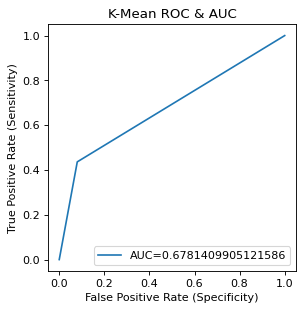


 *******K means fold:  3 **********
Accuracy score:  0.8670793882010197


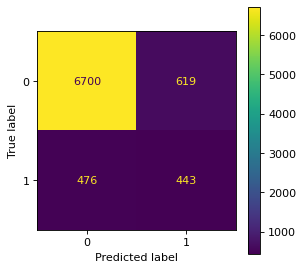

Specificity:  0.9154256045907911
Sensitivity 0.4820457018498368
Precision 0.4171374764595104
F1_score 0.447248864209995


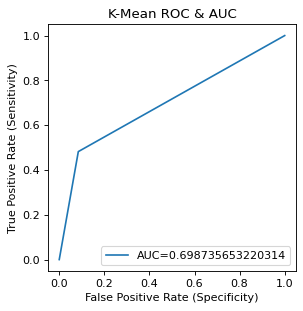


 *******K means fold:  4 **********
Accuracy score:  0.12625956051960666


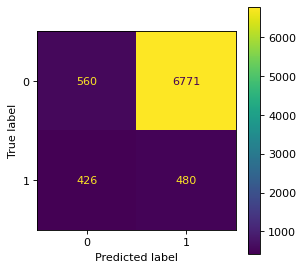

Specificity:  0.07638794161778747
Sensitivity 0.5298013245033113
Precision 0.06619776582540339
F1_score 0.11769032732622287


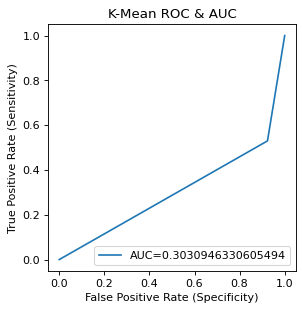


 *******K means fold:  5 **********
Accuracy score:  0.8652421998300353


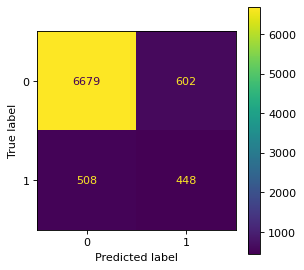

Specificity:  0.9173190495811014
Sensitivity 0.4686192468619247
Precision 0.4266666666666667
F1_score 0.4466600199401795


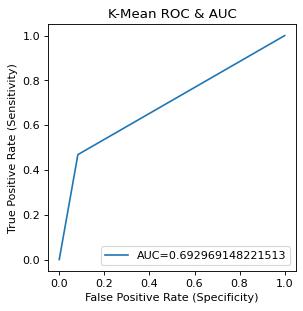

In [ ]:
cv = KFold(n_splits=5, shuffle=True,random_state=21)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
acc_score = []
i = 1

for train_index, test_index in cv.split(X):
  print("\n *******K means fold: ", i, "**********")

  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  kmeans.fit(X_train, y_train)
  y_pred = kmeans.predict(X_test)
  
  cm = confusion_matrix(y_test, y_pred)
  acc_score.append(accuracy_score(y_test, y_pred))
  print("Accuracy score: ", accuracy_score(y_test, y_pred))

  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

  # confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  # Performance - Sensitivity, Specificity, F1_score, Precision
  tn, fp, fn, tp = cm.ravel()

  spec = tn / (tn + fp)
  print("Specificity: ", spec)
  
  sens = tp / (tp + fn)
  print("Sensitivity", sens)

  PPV = tp/(tp+fp)
  print("Precision", PPV)
  
  f1_score = (2*PPV*sens)/(PPV+sens)
  print("F1_score",f1_score)

  fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
  area        = metrics.roc_auc_score(y_test,y_pred)

  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
  plt.plot(fpr,tpr,label="AUC="+str(area))
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.xlabel('False Positive Rate (Specificity)')
  plt.legend(loc=4)
  plt.title('K-Mean ROC & AUC')
  plt.show()
  i+=1

Kmeans Clusteing - GridSearch CV results

Accuracy:  0.8651371692158291


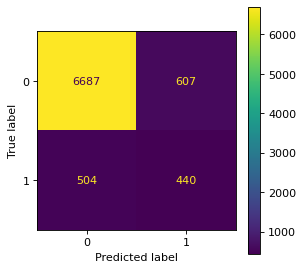

Specificity:  0.9167809158212229
Sensitivity 0.4661016949152542
Precision 0.42024832855778416
F1_score 0.4419889502762431


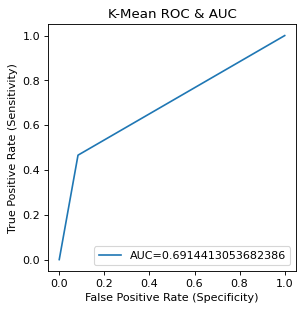

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)
#Kmeans classifier
kmeans = KMeans()
param_grid = {
    'max_iter': [300],
    'n_clusters': [2],
    'init': ['k-means++'],
    'n_init': [10]
    }

#5 Fold cross validation
clf = GridSearchCV(estimator= kmeans, param_grid=param_grid, cv = 5, return_train_score=True)

#fit the classifier
score = clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)

#Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

#confusion matrix
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Performance - Sensitivity, Specificity, F1_score, Precision
tn, fp, fn, tp = cm.ravel()

spec = tn / (tn + fp)
print("Specificity: ", spec)

sens = tp / (tp + fn)
print("Sensitivity", sens)

PPV = tp/(tp+fp)
print("Precision", PPV)

f1_score = (2*PPV*sens)/(PPV+sens)
print("F1_score",f1_score)

# ROC & AUC
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
area        = metrics.roc_auc_score(y_test,y_pred)

plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
plt.plot(fpr,tpr,label="AUC="+str(area))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (Specificity)')
plt.legend(loc=4)
plt.title('K-Mean ROC & AUC')
plt.show()

**Fuzzy C Means**


 *******C- means fold:  1 **********
Accuracy score:  0.14942947317310026


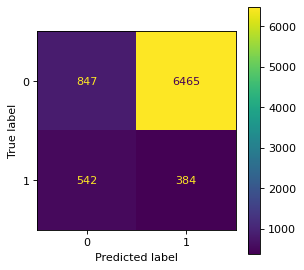

Specificity:  0.11583698030634573
Sensitivity 0.4146868250539957
Precision 0.05606657906263688
F1_score 0.0987781350482315


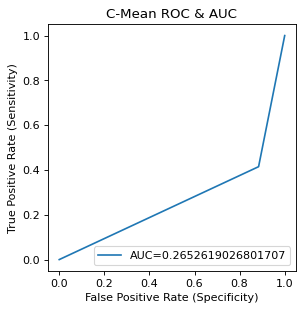


 *******C- means fold:  2 **********
Accuracy score:  0.844743869871328


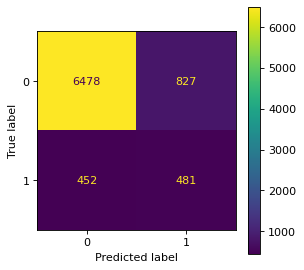

Specificity:  0.8867898699520876
Sensitivity 0.5155412647374062
Precision 0.367737003058104
F1_score 0.42927264614011607


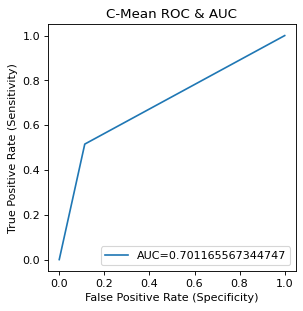


 *******C- means fold:  3 **********
Accuracy score:  0.14942947317310026


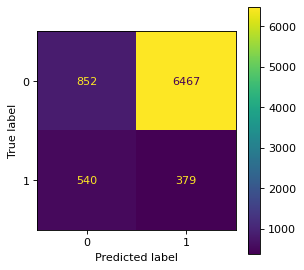

Specificity:  0.11640934553900806
Sensitivity 0.41240478781284007
Precision 0.05536079462459831
F1_score 0.09761751448808759


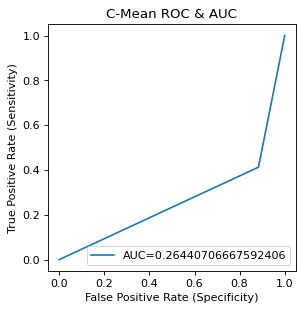


 *******C- means fold:  4 **********
Accuracy score:  0.8578365909918659


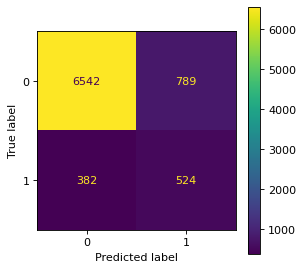

Specificity:  0.8923748465420815
Sensitivity 0.5783664459161147
Precision 0.3990860624523991
F1_score 0.47228481297881925


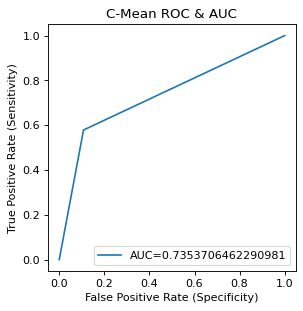


 *******C- means fold:  5 **********
Accuracy score:  0.15284691028286998


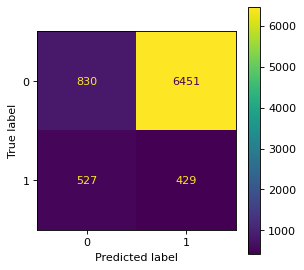

Specificity:  0.11399533031177037
Sensitivity 0.448744769874477
Precision 0.062354651162790695
F1_score 0.10949464012251148


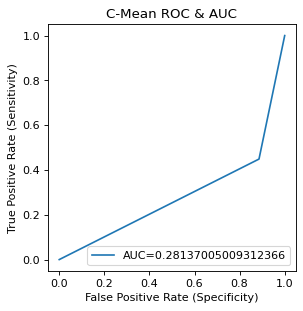

In [ ]:
fcmModel = FCM(n_clusters=2, random_state=1)
i = 1
accu = {}
sensitivity = {} 
specificity = {}
pre = {}
f_score = {}
for train_index, test_index in cv.split(X):
  print("\n *******C- means fold: ", i, "**********")

  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  fcmModel.fit(X_train.to_numpy())
  center = fcmModel.centers
  y_pred = fcmModel.predict(X_test.to_numpy())
  
  cm = confusion_matrix(y_test, y_pred)
  score = accuracy_score(y_test, y_pred)
  accu[i] = score
  print("Accuracy score: ", accuracy_score(y_test, y_pred))

  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

  # confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  # Performance - Sensitivity, Specificity, F1_score, Precision
  tn, fp, fn, tp = cm.ravel()

  spec = tn / (tn + fp)
  print("Specificity: ", spec)
  specificity[i] = spec
  
  sens = tp / (tp + fn)
  print("Sensitivity", sens)
  sensitivity[i] = sens

  PPV = tp/(tp+fp)
  print("Precision", PPV)
  pre[i] = PPV
  
  f1_score = (2*PPV*sens)/(PPV+sens)
  print("F1_score",f1_score)
  f_score[i] = f1_score

  # ROC & AUC
  fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
  area        = metrics.roc_auc_score(y_test,y_pred)

  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})
  plt.plot(fpr,tpr,label="AUC="+str(area))
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.xlabel('False Positive Rate (Specificity)')
  plt.legend(loc=4)
  plt.title('C-Mean ROC & AUC')
  plt.show()
  i+=1

In [ ]:
max_accuracy = max(accu.values())
print(max_accuracy)

fold = max(accu, key=accu.get)
print("Fold which got the max accuracy:", fold)

print("sensitivity for C- means:", sensitivity.get(fold))
print("specificity for C- means:", specificity.get(fold))
print("precision for C- means:", pre.get(fold))
print("f1_score for C- means:", f_score.get(fold))

0.8578365909918659
Fold which got the max accuracy: 4
sensitivity for C- means: 0.5783664459161147
specificity for C- means: 0.8923748465420815
precision for C- means: 0.3990860624523991
f1_score for C- means: 0.47228481297881925
